INSTALL PACKAGES AND LOAD DATASETS


In [1]:
#@title
!pip install plotly==5.13.1
import plotly.io as pio
from collections import Counter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from pprint import pprint
import regex as re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
from textblob.blob import word_tokenize
#import geopandas as gpd
nltk.download('stopwords')
nltk.download('brown')
import string
!pip install wordcloud
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display, Image, clear_output
from IPython import get_ipython
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import matplotlib.font_manager
from PIL import Image
import numpy as np
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


MOUNT GOOGLE DRIVE

In [2]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LOAD 4 CSV DATASETS FOR EXPLORATION ETC

In [3]:
#@title
jamesbond1 = pd.read_csv("/content/drive/MyDrive/Bond1.csv")
jamesbond2 = pd.read_csv("/content/drive/MyDrive/Bond_Comb.csv")
rottentom = pd.read_csv("/content/drive/MyDrive/rotten_tomatoes.csv",encoding='latin1')
bafta = pd.read_csv("/content/drive/MyDrive/BAFTA.csv")


DATAFRAMES INVESTIGATION AND MERGE TO CREATE ONE DATAFRAME BY FILMS AND ONE GROUPED DATAFRAME BY BOND ACTORS

In [4]:
#@title
jamesbond1

,Year,Movie,Bond,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,Bond_Car_MFG,...,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100,Video_Game
0,1962,Dr. No,Sean Connery,Terence Young,Monty Norman,"Richard Maibaum, Johanna Harwood & Berkely Mather",Ted Moore,"Great Britain, Jamaic","England, Jamaica",Sunbeam,...,110,7.3,7.7,3.0,2.0,1.0,4.0,8.0,0.0,0.0
1,1963,From Russia with Love,Sean Connery,Terence Young,John Barry,Richard Maibaum & Johanna Harwood,Ted Moore,"United Kingdom, Great Britain, Turkey, Croatia...","England, Scotland, Italy, Switzerland, Turkey",Bently,...,115,7.5,8.0,4.0,0.0,0.0,11.0,16.0,0.0,1.0
2,1964,Goldfinger,Sean Connery,Guy Hamilton,John Barry,Richard Maibaum & Paul Dehn,Ted Moore,"United States, Great Britain, Switzerland","England, Switzerland, United States",Aston Martin,...,110,7.8,8.4,2.0,1.0,2.0,9.0,68.0,1.0,1.0
3,1965,Thunderball,Sean Connery,Terence Young,John Barry,Richard Maibaum & John Hopkins,Ted Moore,"France, Great Britain, Bahamas, United States","England, France, Bahamas, United States",Aston Martin,...,130,7.0,6.8,3.0,0.0,0.0,20.0,90.0,1.0,0.0
4,1967,You Only Live Twice,Sean Connery,Lewis Gilbert,John Barry,Roald Dahl,Freddie Young,"United States, Russia, Kazakhstan, Norway, Japan","Japan, Spain, Norway",Toyota,...,117,6.9,6.3,3.0,1.0,0.0,21.0,175.0,1.0,0.0
5,1969,On Her Majesty's Secret Service,George Lazenby,Peter R. Hunt,John Barry,Richard Maibaum,Michael Reed,"Portugal, Great Britain, Switzerland","England, Switzerland, Portugal",Mercury,...,142,6.8,6.7,3.0,1.0,2.0,5.0,37.0,0.0,0.0
6,1971,Diamonds Are Forever,Sean Connery,Guy Hamilton,John Barry,Richard Maibaum & Tom Mankiewicz,Ted Moore,"Japan, Egypt, France, South Africa, Great Brit...","England, France, Germany, Netherlands, United ...",Ford,...,120,6.7,6.3,1.0,0.0,1.0,7.0,42.0,1.0,0.0
7,1973,Live and Let Die,Roger Moore,Guy Hamilton,George Martin,Tom Mankiewicz,Ted Moore,"United States, Great Britain, Jamaica","England, United States, Jamaica",AMC,...,121,6.8,5.9,3.0,0.0,1.0,8.0,5.0,1.0,1.0
8,1974,The Man with the Golden Gun,Roger Moore,Guy Hamilton,John Barry,Richard Maibaum & Tom Mankiewicz,Ted Moore,"Great Britain, Lebanon, Portugal, Thailand","England, Thailand, Hong Kong, Portugal",AMC,...,125,6.7,5.1,2.0,0.0,2.0,1.0,5.0,0.0,0.0
9,1977,The Spy Who Loved Me,Roger Moore,Lewis Gilbert,Marvin Hamlisch,Christopher Wood & Richard Maibaum,Claude Renoir,"Austria, Russia, Great Britain, Egypt, Italy","England, Switzerland, Canada, Scotland, Egypt,...",Lotus,...,125,7.1,6.8,3.0,1.0,1.0,31.0,116.0,1.0,1.0


In [5]:
#@title
jamesbond1.rename(columns = {'Movie':'Title'},inplace = True)
jamesbond1['Titlewc'] = jamesbond1['Title'].apply(lambda x: x.lower())
jamesbond1 = jamesbond1[['Year','Title','Titlewc','Depicted_Film_Loc','Martinis','Film_Length', 'Kills_Bond','Kills_Others']]
jamesbond1

,Year,Title,Titlewc,Depicted_Film_Loc,Martinis,Film_Length,Kills_Bond,Kills_Others
0,1962,Dr. No,dr. no,"Great Britain, Jamaic",2.0,110,4.0,8.0
1,1963,From Russia with Love,from russia with love,"United Kingdom, Great Britain, Turkey, Croatia...",0.0,115,11.0,16.0
2,1964,Goldfinger,goldfinger,"United States, Great Britain, Switzerland",1.0,110,9.0,68.0
3,1965,Thunderball,thunderball,"France, Great Britain, Bahamas, United States",0.0,130,20.0,90.0
4,1967,You Only Live Twice,you only live twice,"United States, Russia, Kazakhstan, Norway, Japan",1.0,117,21.0,175.0
5,1969,On Her Majesty's Secret Service,on her majesty's secret service,"Portugal, Great Britain, Switzerland",1.0,142,5.0,37.0
6,1971,Diamonds Are Forever,diamonds are forever,"Japan, Egypt, France, South Africa, Great Brit...",0.0,120,7.0,42.0
7,1973,Live and Let Die,live and let die,"United States, Great Britain, Jamaica",0.0,121,8.0,5.0
8,1974,The Man with the Golden Gun,the man with the golden gun,"Great Britain, Lebanon, Portugal, Thailand",0.0,125,1.0,5.0
9,1977,The Spy Who Loved Me,the spy who loved me,"Austria, Russia, Great Britain, Egypt, Italy",1.0,125,31.0,116.0


In [6]:
#@title
jamesbond2['Titlewc'] = jamesbond2['Title'].apply(lambda x: x.lower())
jamesbond2

,Unnamed: 0,Title,Year,Bond actor,Director,BO Actual,BO Adjusted,Budget_Act,Budg_Adj,Tom_Crit,Tom_Aud,Titlewc
0,0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7,95.0,82.0,dr. no
1,1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2,12.6,97.0,84.0,from russia with love
2,2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3,18.6,99.0,89.0,goldfinger
3,3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,85.0,73.0,thunderball
4,4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,74.0,68.0,you only live twice
5,5,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,64.6,291.5,7,37.3,81.0,64.0,on her majesty's secret service
6,6,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,63.0,57.0,diamonds are forever
7,7,Live and Let Die,1973,Roger Moore,Guy Hamilton,126.4,460.3,7,30.8,65.0,64.0,live and let die
8,8,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,97.6,334.0,7,27.7,42.0,55.0,the man with the golden gun
9,9,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,185.4,533.0,14,45.1,81.0,76.0,the spy who loved me


In [7]:
#@title
rottentom['movie_title'] = rottentom['movie_title'].apply(lambda x: x.lower())
jbrotten_tom = rottentom[rottentom['movie_title'].isin(jamesbond2['Titlewc'])]
jbrotten_tom = jbrotten_tom[['movie_title','critics_consensus']]
jbrotten_tom.rename(columns = {'movie_title':'Titlewc'},inplace = True)
jbrotten_tom

,Titlewc,critics_consensus
358,casino royale,"A goofy, dated parody of spy movie clichÃ©s, C..."
610,moonraker,Featuring one of the series' more ludicrous pl...
4348,casino royale,Casino Royale disposes of the silliness and ga...
5473,diamonds are forever,Diamonds are Forever is a largely derivative a...
5490,die another day,Its action may be bit too over-the-top for som...
5716,dr. no,"Featuring plenty of the humor, action, and esc..."
6622,for your eyes only,For Your Eyes Only trades in some of the outla...
6793,from russia with love,"The second James Bond film, From Russia with L..."
7149,goldeneye,"The first and best Pierce Brosnan Bond film, G..."
7150,goldfinger,Goldfinger is where James Bond as we know him ...


In [8]:
#@title
bafta = pd.read_csv("/content/drive/MyDrive/BAFTA.csv")
bafta = bafta.dropna(axis=0)
bafta['Film'] = bafta['Film'].apply(lambda x: x.lower())
bafta.head(5)

,Unnamed: 0,Film,Awards
1,0.0,dr. no,"Winner, Golden Globe Award for New Star of the..."
2,1.0,from russia with love,"Winner, BAFTA Award for British Cinematography..."
3,2.0,goldfinger,"Winner, Academy Award for Best Sound Effects a..."
4,3.0,thunderball,"Winner, Academy Award for Best Visual Effects ..."
5,4.0,you only live twice,"Nominated, BAFTA Award for Best British Art Di..."


MERGE DATAFRAMES WITH RELEVANT INFORMATION

In [9]:
#@title
jamesbonddf = (pd.merge(jamesbond1, jamesbond2, on='Titlewc'))
jamesbonddf = (pd.merge(jamesbonddf,jbrotten_tom, on = 'Titlewc')).reset_index()
jamesbonddf.rename(columns = {'Year_x':'Year'}, inplace=True)
jamesbonddf = jamesbonddf.drop('Year_y', axis = 1)
jamesbonddf['Average Rating']= (jamesbonddf['Tom_Crit']+jamesbonddf['Tom_Aud'])/2
jamesbonddf.to_csv('JamesBond.csv',index = False)
jamesbonddf

,index,Year,Title_x,Titlewc,Depicted_Film_Loc,Martinis,Film_Length,Kills_Bond,Kills_Others,Unnamed: 0,...,Bond actor,Director,BO Actual,BO Adjusted,Budget_Act,Budg_Adj,Tom_Crit,Tom_Aud,critics_consensus,Average Rating
0,0,1962,Dr. No,dr. no,"Great Britain, Jamaic",2.0,110,4.0,8.0,0,...,Sean Connery,Terence Young,59.5,448.8,1.1,7,95.0,82.0,"Featuring plenty of the humor, action, and esc...",88.5
1,1,1963,From Russia with Love,from russia with love,"United Kingdom, Great Britain, Turkey, Croatia...",0.0,115,11.0,16.0,1,...,Sean Connery,Terence Young,78.9,543.8,2,12.6,97.0,84.0,"The second James Bond film, From Russia with L...",90.5
2,2,1964,Goldfinger,goldfinger,"United States, Great Britain, Switzerland",1.0,110,9.0,68.0,2,...,Sean Connery,Guy Hamilton,124.9,820.4,3,18.6,99.0,89.0,Goldfinger is where James Bond as we know him ...,94.0
3,3,1965,Thunderball,thunderball,"France, Great Britain, Bahamas, United States",0.0,130,20.0,90.0,3,...,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,85.0,73.0,Lavishly rendered set pieces and Sean Connery'...,79.0
4,4,1967,You Only Live Twice,you only live twice,"United States, Russia, Kazakhstan, Norway, Japan",1.0,117,21.0,175.0,4,...,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,74.0,68.0,"With exotic locales, impressive special effect...",71.0
5,5,1969,On Her Majesty's Secret Service,on her majesty's secret service,"Portugal, Great Britain, Switzerland",1.0,142,5.0,37.0,5,...,George Lazenby,Peter R. Hunt,64.6,291.5,7,37.3,81.0,64.0,George Lazenby's only appearance as 007 is a f...,72.5
6,6,1971,Diamonds Are Forever,diamonds are forever,"Japan, Egypt, France, South Africa, Great Brit...",0.0,120,7.0,42.0,6,...,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,63.0,57.0,Diamonds are Forever is a largely derivative a...,60.0
7,7,1973,Live and Let Die,live and let die,"United States, Great Britain, Jamaica",0.0,121,8.0,5.0,7,...,Roger Moore,Guy Hamilton,126.4,460.3,7,30.8,65.0,64.0,"While not one of the highest-rated Bond films,...",64.5
8,8,1974,The Man with the Golden Gun,the man with the golden gun,"Great Britain, Lebanon, Portugal, Thailand",0.0,125,1.0,5.0,8,...,Roger Moore,Guy Hamilton,97.6,334.0,7,27.7,42.0,55.0,"A middling Bond film, The Man With the Golden ...",48.5
9,9,1977,The Spy Who Loved Me,the spy who loved me,"Austria, Russia, Great Britain, Egypt, Italy",1.0,125,31.0,116.0,9,...,Roger Moore,Lewis Gilbert,185.4,533.0,14,45.1,81.0,76.0,Though it hints at the absurdity to come in la...,78.5


In [10]:
#@title
jamesbond = pd.read_csv('JamesBond.csv')
jamesbond = jamesbond.drop([20]).reset_index()
jamesbond.rename(columns = {"Title_x":"Title"},inplace=True)
jamesbond

,level_0,index,Year,Title,Titlewc,Depicted_Film_Loc,Martinis,Film_Length,Kills_Bond,Kills_Others,...,Bond actor,Director,BO Actual,BO Adjusted,Budget_Act,Budg_Adj,Tom_Crit,Tom_Aud,critics_consensus,Average Rating
0,0,0,1962,Dr. No,dr. no,"Great Britain, Jamaic",2.0,110,4.0,8.0,...,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,95.0,82.0,"Featuring plenty of the humor, action, and esc...",88.5
1,1,1,1963,From Russia with Love,from russia with love,"United Kingdom, Great Britain, Turkey, Croatia...",0.0,115,11.0,16.0,...,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,97.0,84.0,"The second James Bond film, From Russia with L...",90.5
2,2,2,1964,Goldfinger,goldfinger,"United States, Great Britain, Switzerland",1.0,110,9.0,68.0,...,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,99.0,89.0,Goldfinger is where James Bond as we know him ...,94.0
3,3,3,1965,Thunderball,thunderball,"France, Great Britain, Bahamas, United States",0.0,130,20.0,90.0,...,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,85.0,73.0,Lavishly rendered set pieces and Sean Connery'...,79.0
4,4,4,1967,You Only Live Twice,you only live twice,"United States, Russia, Kazakhstan, Norway, Japan",1.0,117,21.0,175.0,...,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,74.0,68.0,"With exotic locales, impressive special effect...",71.0
5,5,5,1969,On Her Majesty's Secret Service,on her majesty's secret service,"Portugal, Great Britain, Switzerland",1.0,142,5.0,37.0,...,George Lazenby,Peter R. Hunt,64.6,291.5,7.0,37.3,81.0,64.0,George Lazenby's only appearance as 007 is a f...,72.5
6,6,6,1971,Diamonds Are Forever,diamonds are forever,"Japan, Egypt, France, South Africa, Great Brit...",0.0,120,7.0,42.0,...,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7,63.0,57.0,Diamonds are Forever is a largely derivative a...,60.0
7,7,7,1973,Live and Let Die,live and let die,"United States, Great Britain, Jamaica",0.0,121,8.0,5.0,...,Roger Moore,Guy Hamilton,126.4,460.3,7.0,30.8,65.0,64.0,"While not one of the highest-rated Bond films,...",64.5
8,8,8,1974,The Man with the Golden Gun,the man with the golden gun,"Great Britain, Lebanon, Portugal, Thailand",0.0,125,1.0,5.0,...,Roger Moore,Guy Hamilton,97.6,334.0,7.0,27.7,42.0,55.0,"A middling Bond film, The Man With the Golden ...",48.5
9,9,9,1977,The Spy Who Loved Me,the spy who loved me,"Austria, Russia, Great Britain, Egypt, Italy",1.0,125,31.0,116.0,...,Roger Moore,Lewis Gilbert,185.4,533.0,14.0,45.1,81.0,76.0,Though it hints at the absurdity to come in la...,78.5


DATA EXPLORATION

CORRELATION OF FEATURES IN A TABLE

In [11]:
#@title
#Correlation heatmap between average move rating and number of features
jamesbond.corr()

<ipython-input-11-7766e4dd4815>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  jamesbond.corr()


,level_0,index,Year,Martinis,Film_Length,Kills_Bond,Kills_Others,Unnamed: 0,BO Actual,BO Adjusted,Budget_Act,Budg_Adj,Tom_Crit,Tom_Aud,Average Rating
level_0,1.000000,1.000000,0.991678,0.454174,0.598878,0.500179,-0.009250,0.999260,0.848867,0.115760,0.898819,0.907665,-0.220943,-0.100176,-0.168488
index,1.000000,1.000000,0.991678,0.454174,0.598878,0.500179,-0.009250,0.999260,0.848867,0.115760,0.898819,0.907665,-0.220943,-0.100176,-0.168488
Year,0.991678,0.991678,1.000000,0.476005,0.614214,0.526373,0.003624,0.988272,0.883972,0.178183,0.937441,0.926265,-0.148675,-0.022749,-0.091979
Martinis,0.454174,0.454174,0.476005,1.000000,-0.188885,0.090250,-0.152602,0.439193,0.390710,0.044849,0.574441,0.554126,0.162720,0.097506,0.135746
Film_Length,0.598878,0.598878,0.614214,-0.188885,1.000000,0.229645,0.181269,0.594985,0.579717,0.109045,0.538074,0.492180,0.011572,0.114838,0.061333
Kills_Bond,0.500179,0.500179,0.526373,0.090250,0.229645,1.000000,0.309474,0.509857,0.478948,0.344442,0.476176,0.528427,0.012217,0.068342,0.038806
Kills_Others,-0.009250,-0.009250,0.003624,-0.152602,0.181269,0.309474,1.000000,-0.016814,0.149427,0.344035,0.153326,0.185553,-0.023199,-0.023327,-0.023773
Unnamed: 0,0.999260,0.999260,0.988272,0.439193,0.594985,0.509857,-0.016814,1.000000,0.832957,0.093888,0.887628,0.902506,-0.242210,-0.123680,-0.191347
BO Actual,0.848867,0.848867,0.883972,0.390710,0.579717,0.478948,0.149427,0.832957,1.000000,0.544756,0.888838,0.828604,0.113217,0.227569,0.170778
BO Adjusted,0.115760,0.115760,0.178183,0.044849,0.109045,0.344442,0.344035,0.093888,0.544756,1.000000,0.310297,0.245575,0.515145,0.541953,0.540598


CORRELATION OF FEATURES IN A HEATMAP

<ipython-input-12-e5621d7c3df2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(jamesbond.corr());


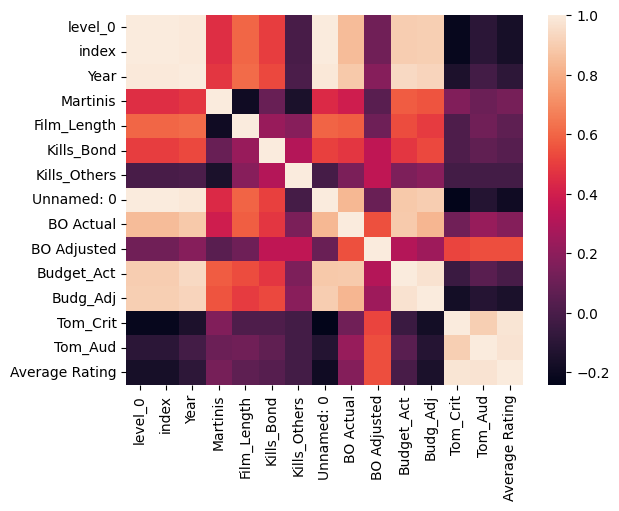

In [12]:
#@title
sns.heatmap(jamesbond.corr());

EXPLORE LOCATIONS VISITED IN DIFFERENT FILMS

In [13]:
#@title
#Frequency of locations visited in films
def split_words(text):
  loc = []
  loc = text.split(',')
  return(loc)

all_locs = []
locationdf = jamesbond[['Year','Titlewc','Bond actor','Depicted_Film_Loc']].copy()
locationdf['Location'] = locationdf['Depicted_Film_Loc'].apply(split_words)
all_locs = locationdf['Depicted_Film_Loc'].str.cat(sep=', ')
words = all_locs.split(",")
word_counts = Counter(words)
popular_locs = {key: value for key, value in word_counts.items() if value > 2}
pprint(popular_locs)


{' Austria': 4,
 ' Bahamas': 3,
 ' England': 8,
 ' France': 4,
 ' Great Britain': 14,
 ' Italy': 8,
 ' Japan': 3,
 ' Russia': 9,
 ' Turkey': 3,
 ' United States': 10}


In [14]:
#@title
def cleanupDoc(s):
  cleanup = []
  for token in s:
    #if token.lower() not in stopset and len(token)>2:
    cleanup.append(token.lower())
  return cleanup


EXPLORE FILM REVIEWS FOR DIFFERENT BOND FILMS AND MERGE THEM

In [15]:
#@title
#Exploring reviews of James Bond films
nltk.download('stopwords')
nltk.download('brown')
import string

def get_words(text):
    Bond_Words = ['james','bond','sean','connery','roger','moore','daniel','craig','pierce','brosnen','timothy','dalton','george','lazenby']
    punctuation = list(string.punctuation)
    stopset = set(stopwords.words('english') + punctuation + Bond_Words)
    text = re.sub("(?<=[a-z])'(?=[a-z])", "", text)
    word_tokens = word_tokenize(text)
    print(word_tokens)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stopset]
    print(filtered_sentence)
    #filtered_sentence = ' '.join(filtered_sentence)
    #print(filtered_sentence)
    #blob = TextBlob(filtered_sentence)
    #print(blob)
    return(filtered_sentence)

all_words = []
jamesbond['adj'] = jamesbond['critics_consensus'].apply(get_words)
criticdf = jamesbond[['Year','Titlewc','Bond actor','critics_consensus','adj']].copy()

for i in criticdf['adj']:
  for x in i:
     all_words.append(x)

word_count = Counter(all_words)
popular_words = {key: value for key, value in word_count.items() if value > 1}
pprint(popular_words)

pprint(popular_words)

['Featuring', 'plenty', 'humor', 'action', 'escapist', 'thrills', 'series', 'would', 'become', 'known', 'Dr.', 'kicks', 'franchise', 'style']
['second', 'film', 'Russia', 'Love', 'razor-sharp', 'briskly-paced', 'Cold', 'War', 'thriller', 'features', 'several', 'electrifying', 'action', 'scenes']
['Goldfinger', 'know', 'comes', 'focus', 'features', 'one', '007', "'s", 'famous', 'lines', '``', 'martini', 'Shaken', 'stirred', "''", 'wide', 'range', 'gadgets', 'would', 'become', 'series', 'trademark']
['Lavishly', 'rendered', 'set', 'pieces', 'Connerys', 'enduring', 'charm', 'make', 'Thunderball', 'big', 'fun', 'adventure', 'even', 'doesnt', 'quite', 'measure', 'series', 'previous', 'heights']
['exotic', 'locales', 'impressive', 'special', 'effects', 'worthy', 'central', 'villain', 'Live', 'Twice', 'overcomes', 'messy', 'implausible', 'story', 'deliver', 'another', 'memorable', 'early', 'flick']
['Lazenbys', 'appearance', '007', 'fine', 'entry', 'series', 'featuring', 'one', 'intriguing', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


GROUP ROWS BY ACTOR FOR VISUALISATION 2

In [16]:
#@title
#Group features by Bond actor
import functools as ft
def join_words(text):
  onelist = []
  for m in text:
    for n in m:
      onelist.append(n)
  joined =' '.join(onelist)
  return(joined)

bondyf = jamesbond.groupby(['Bond actor'])['Year'].max()
bondyf1 = jamesbond[['Bond actor','Titlewc','Title','Year']]
bondyf1 = bondyf1[bondyf1['Year'].isin(bondyf)]

moviereviewdf = jamesbond.groupby('Bond actor')['adj'].apply(list)
ratingsdfb = jamesbond.groupby(['Bond actor'])['Tom_Crit','Tom_Aud'].sum()
numberofmoviesdf = jamesbond.groupby(['Bond actor'])['Bond actor'].count()
moviereviewdf = moviereviewdf.to_frame()
numberofmoviesdf = numberofmoviesdf.to_frame(name = 'Number of movies') 

dfs = [numberofmoviesdf,moviereviewdf,ratingsdfb]
bonddf = ft.reduce(lambda left, right: pd.merge(left, right, on='Bond actor'), dfs)
bonddf['Average rating'] = (bonddf['Tom_Crit']+bonddf['Tom_Aud'])/(bonddf['Number of movies']*2)

bonddf = (pd.merge(bonddf, bondyf1, on = 'Bond actor'))
bonddf['all_words'] = bonddf['adj'].apply(join_words)
bonddf



<ipython-input-16-d4ae19f07163>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratingsdfb = jamesbond.groupby(['Bond actor'])['Tom_Crit','Tom_Aud'].sum()


,Bond actor,Number of movies,adj,Tom_Crit,Tom_Aud,Average rating,Titlewc,Title,Year,all_words
0,Daniel Craig,5,"[[Casino, Royale, disposes, silliness, gadgetr...",396.0,383.0,77.900,no time to die,No Time to Die,2022,Casino Royale disposes silliness gadgetry plag...
1,George Lazenby,1,"[[Lazenbys, appearance, 007, fine, entry, seri...",81.0,64.0,72.500,on her majesty's secret service,On Her Majesty's Secret Service,1969,Lazenbys appearance 007 fine entry series feat...
2,Pierce Brosnan,4,"[[first, best, Brosnan, film, GoldenEye, bring...",243.0,226.0,58.625,die another day,Die Another Day,2002,first best Brosnan film GoldenEye brings serie...
3,Roger Moore,7,"[[one, highest-rated, films, Live, Let, Die, f...",395.0,389.0,56.000,a view to a kill,A View to a Kill,1985,one highest-rated films Live Let Die finds add...
4,Sean Connery,6,"[[Featuring, plenty, humor, action, escapist, ...",513.0,453.0,80.500,diamonds are forever,Diamonds Are Forever,1971,Featuring plenty humor action escapist thrills...
5,Timothy Dalton,2,"[[Newcomer, plays, seriousness, preceding, ins...",152.0,127.0,69.750,licence to kill,Licence to Kill,1989,Newcomer plays seriousness preceding installme...


SAVE THE 2 FINAL DATAFRAMES FOR VISUALISATIONS

In [17]:
#@title
bonddf.to_csv('/content/drive/MyDrive/BondAve.csv',index = False)
jamesbond.to_csv('/content/drive/MyDrive/JamesBond.csv',index = False)